<a href="https://colab.research.google.com/github/namanjain0531/FlipRobotech/blob/master/Spam_Mail_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas  as pd
import numpy as np

In [2]:
import nltk, re
nltk.download('stopwords') # load english stopwords
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
warnings.warn("deprecated", DeprecationWarning)
warnings.simplefilter("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
data=pd.read_csv(r'/content/drive/My Drive/CSV/messages.csv')
data

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [5]:
data.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [6]:
data=data.replace(np.nan,"",regex=True)
data.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [7]:
data.columns

Index(['subject', 'message', 'label'], dtype='object')

In [8]:
data.shape

(2893, 3)

In [10]:
data.isnull().sum()

subject    0
message    0
label      0
dtype: int64

In [12]:
data.dtypes

subject    object
message    object
label       int64
dtype: object

In [13]:
data.info

<bound method DataFrame.info of                                                 subject  ... label
0               job posting - apple-iss research center  ...     0
1                                                        ...     0
2     query : letter frequencies for text identifica...  ...     0
3                                                  risk  ...     0
4                              request book information  ...     0
...                                                 ...  ...   ...
2888                       love your profile - ysuolvpv  ...     1
2889                 you have been asked to join kiddin  ...     1
2890                 anglicization of composers ' names  ...     0
2891  re : 6 . 797 , comparative method : n - ary co...  ...     0
2892               re : american - english in australia  ...     0

[2893 rows x 3 columns]>

**Visualization**

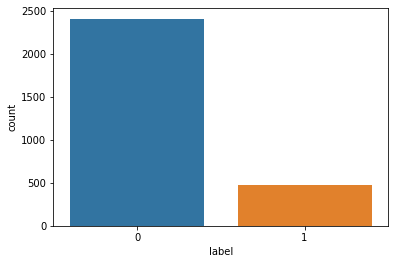

In [14]:
import seaborn as sns
sns.countplot(x=data['label'])

In [15]:
data['information']= data["subject"].astype(str) +" "+ data["message"]
data.head()

,subject,message,label,information
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research center conten...
1,,"lang classification grimes , joseph e . and ba...",0,"lang classification grimes , joseph e . and b..."
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...
3,risk,a colleague and i are researching the differin...,0,risk a colleague and i are researching the dif...
4,request book information,earlier this morning i was on the phone with a...,0,request book information earlier this morning ...


**Feature selection**

In [16]:
data1=data.drop(['subject','message'],axis=1)

In [17]:
data1

,label,information
0,0,job posting - apple-iss research center conten...
1,0,"lang classification grimes , joseph e . and b..."
2,0,query : letter frequencies for text identifica...
3,0,risk a colleague and i are researching the dif...
4,0,request book information earlier this morning ...
...,...,...
2888,1,love your profile - ysuolvpv hello thanks for ...
2889,1,you have been asked to join kiddin the list ow...
2890,0,anglicization of composers ' names judging fro...
2891,0,"re : 6 . 797 , comparative method : n - ary co..."


In [18]:
data1['label'].value_counts()

0    2412
1     481
Name: label, dtype: int64

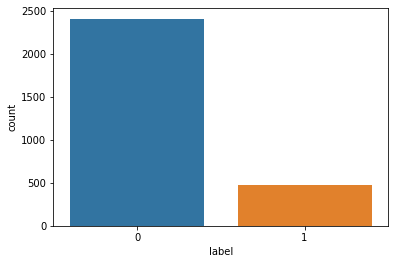

In [19]:
import seaborn as sns
sns.countplot(x=data1['label'])

In [20]:
#New column for Length of message
data1['length'] = data1.information.str.len()
data1.head(100)

,label,information,length
0,0,job posting - apple-iss research center conten...,2896
1,0,"lang classification grimes , joseph e . and b...",1801
2,0,query : letter frequencies for text identifica...,1486
3,0,risk a colleague and i are researching the dif...,329
4,0,request book information earlier this morning ...,1071
...,...,...,...
95,0,job announcement for a spanish sociolinguist a...,1165
96,0,seeking langacker reference in a paper by rona...,583
97,0,he / she > > jeffrey weber replies : > 1 ) my ...,981
98,0,developments in discourse analysis ( gls 1995 ...,10667


In [21]:
def lower_case(series):
    return series.lower()

In [22]:
data1['information']=data1['information'].apply(lower_case)

In [23]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;-_*0-9+]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
def text_prepare(series):
    series=re.sub(r'^.+@[^\.].*\.[a-z]{2,}$','email',series)
    series=re.sub(r'^http\://[a-z0-9\-\.]+\.[a-z]{2,3}(/\S*)?$','webaddress',series)
    series=re.sub(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','number',series)
    series=re.sub(r'\d+(\.\d+)?', 'numbr',series)
    series=re.sub(REPLACE_BY_SPACE_RE," ",series)
    series = re.sub(BAD_SYMBOLS_RE," ",series)
    series = re.sub(r'\s+'," ",series)
    return series

In [24]:
tests = ["SQL server - any equivalent of Excel's CHOOSE function_?164441545, - https://medium.com/@datamonsters",
        "How to free  c++ memory vector<int> * arr?"]
for test in tests: print(text_prepare(test))

 server any equivalent of xcel s function numbr https medium com datamonsters
 ow to free c memory vector int arr 


In [25]:
data1['information']=data1['information'].map(text_prepare)
data1

,label,information,length
0,0,job posting apple iss research center content ...,2896
1,0,lang classification grimes joseph e and barba...,1801
2,0,query letter frequencies for text identificati...,1486
3,0,risk a colleague and i are researching the dif...,329
4,0,request book information earlier this morning ...,1071
...,...,...,...
2888,1,love your profile ysuolvpv hello thanks for st...,291
2889,1,you have been asked to join kiddin the list ow...,2198
2890,0,anglicization of composers names judging from ...,1074
2891,0,re numbr numbr comparative method n ary compar...,3004


In [26]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

data1['information'] = data1['information'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [27]:
# New column (clean_length) after puncuations,stopwords removal
data1['clean_length'] = data1.information.str.len()
data1

,label,information,length,clean_length
0,0,job posting apple iss research center content ...,2896,2077
1,0,lang classification grimes joseph e barbara f ...,1801,1430
2,0,query letter frequencies text identification p...,1486,1109
3,0,risk colleague researching differing degrees r...,329,215
4,0,request book information earlier morning phone...,1071,654
...,...,...,...,...
2888,1,love profile ysuolvpv hello thanks stopping ta...,291,154
2889,1,asked join kiddin list owner kiddin invited jo...,2198,1235
2890,0,anglicization composers names judging return p...,1074,673
2891,0,numbr numbr comparative method n ary compariso...,3004,1921


In [28]:
print('original length',data1.length.sum())
print('clean length',data1.clean_length.sum())

original length 9439299
clean length 6643971


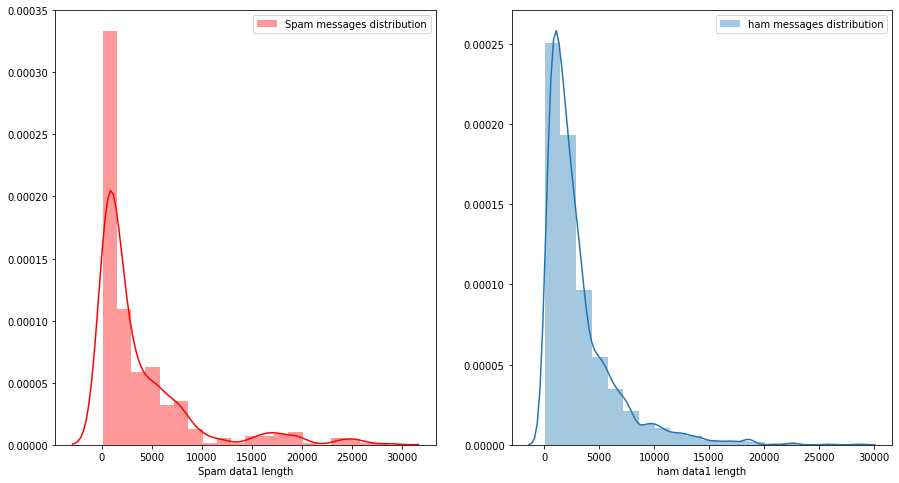

In [29]:
# Message distribution BEFORE cleaning
import matplotlib.pyplot as plt
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(data1[data1['label']==1]['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam data1 length')
ax[0].legend()

sns.distplot(data1[data1['label']==0]['length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham data1 length')
ax[1].legend()

plt.show()

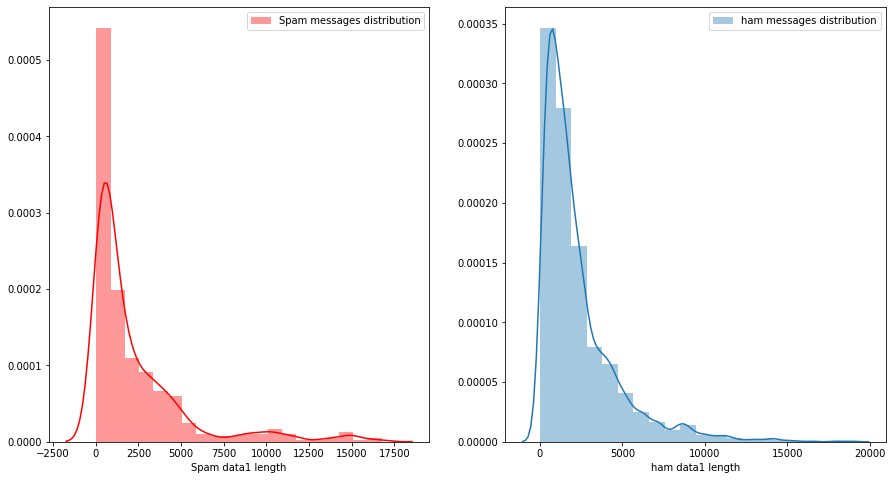

In [30]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(data1[data1['label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam data1 length')
ax[0].legend()

sns.distplot(data1[data1['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham data1 length')
ax[1].legend()

plt.show()

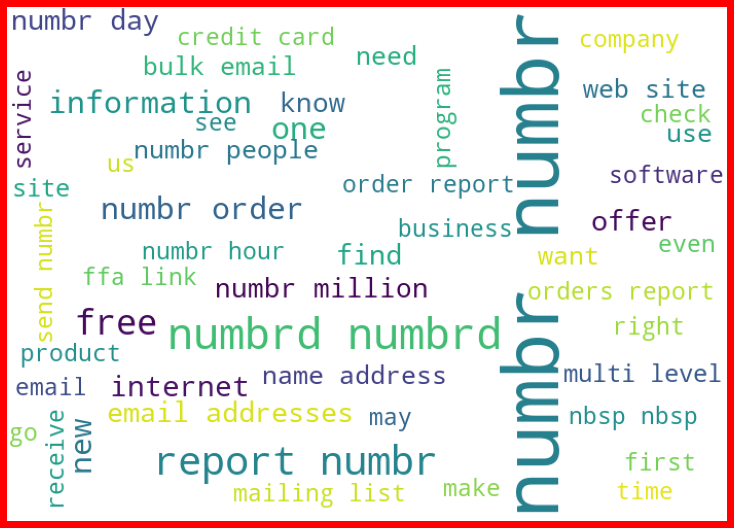

In [31]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = data1['information'][data1['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

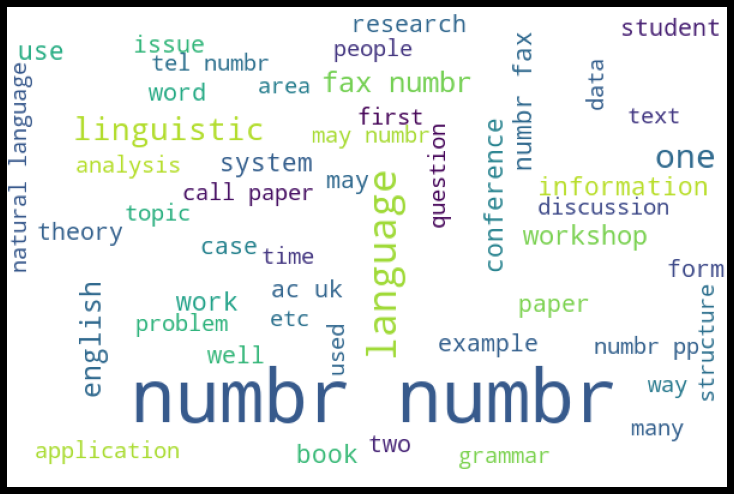

In [32]:
#Getting sense of loud words in ham 

hams = data1['information'][data1['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [33]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(data1['information'])

X = features
y = data1['label']

In [34]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(X,y,train_size=0.8)

In [35]:
#performing over sampling to reduce the over fitting
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
os=RandomOverSampler(0.80)
X_train_ns,Y_train_ns=os.fit_sample(X_train,Y_train)
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_ns)))

The number of classes before fit Counter({0: 1935, 1: 379})
The number of classes after fit Counter({0: 1935, 1: 1548})


In [37]:
naive.fit(X_train_ns,Y_train_ns)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Final score = >  0.9948186528497409
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       477
           1       1.00      0.97      0.99       102

    accuracy                           0.99       579
   macro avg       1.00      0.99      0.99       579
weighted avg       0.99      0.99      0.99       579



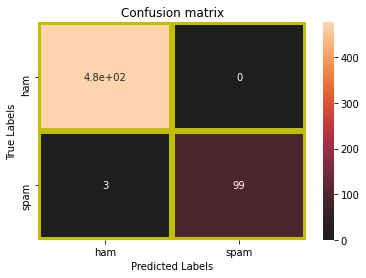

In [38]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='y',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [39]:
conf_mat

array([[477,   0],
       [  3,  99]])

In [40]:
#Log loss metrics
log=log_loss(y_test,y_pred)
print(log)

0.1789573906472066
